**Jordan Kakuyo Homework_2 27/2/2025 IST 707**


**EDA: Loading the data**

In [1]:
import pandas as pd 

#loading the csvs for he training and testing data 
test_data = pd.read_csv('data/bank_test.csv')
train_data = pd.read_csv('data/bank_train.csv')


train_data.describe()

,age,balance,day,campaign,pdays,previous
count,44079.000000,44211.000000,44079.000000,44211.000000,44211.000000,44211.000000
mean,40.930942,1363.799462,15.811702,2.762751,40.210626,0.580715
std,10.621011,3052.574757,8.325447,3.094049,100.114045,2.311291
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,58.000000,871.000000,275.000000


**EDA: Reviewing the data**

In [2]:
#Examining the data types and structure 
# 6 numeric
# 6 categorical 
# 3 binary
train_data.info()

#Looking at the summary stats of the numeric variables 
train_data.describe()

#Checking for columns with missing values 
# 3 columns are missing 5 variables, age, contact and day 
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44211 entries, 0 to 44210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44079 non-null  float64
 1   job        44211 non-null  object 
 2   marital    44211 non-null  object 
 3   education  44211 non-null  object 
 4   default    44211 non-null  object 
 5   balance    44211 non-null  int64  
 6   housing    44211 non-null  object 
 7   loan       44211 non-null  object 
 8   contact    44079 non-null  object 
 9   day        44079 non-null  float64
 10  month      44211 non-null  object 
 11  campaign   44211 non-null  int64  
 12  pdays      44211 non-null  int64  
 13  previous   44211 non-null  int64  
 14  poutcome   44211 non-null  object 
 15  y          44211 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 5.4+ MB


age          132
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact      132
day          132
month          0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

On this step I use describe, info and isnull to view the data structure. The dataset contains 6 numeric 6 categorical and 3 binary variables. From this inital exploraiton, I can see that 3 columns contain missing data, age, contact and day which are all missing 132 variables. 

**EDA 1.2: Data Visualizaiton** 

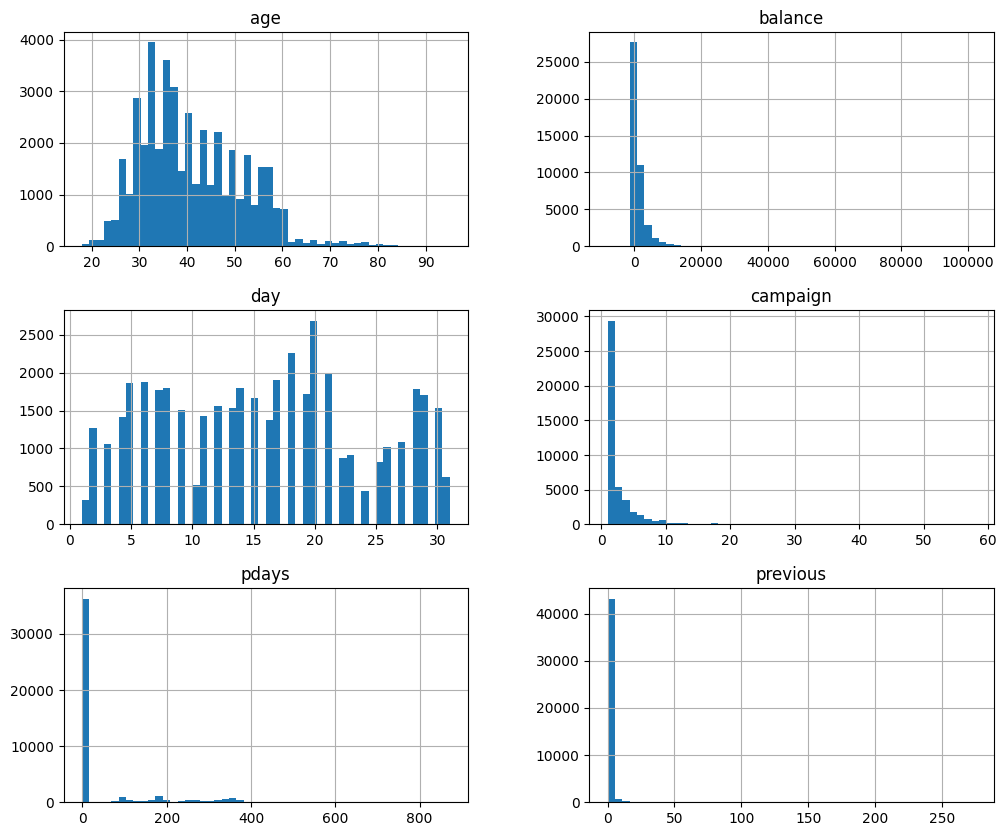

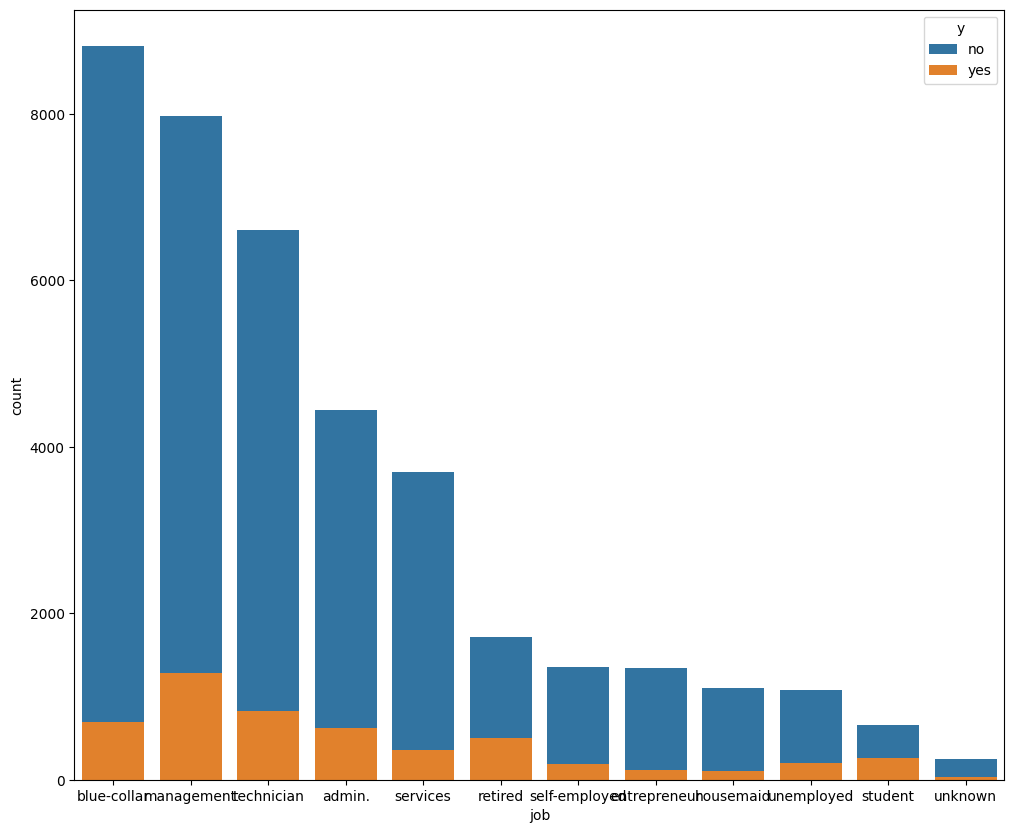

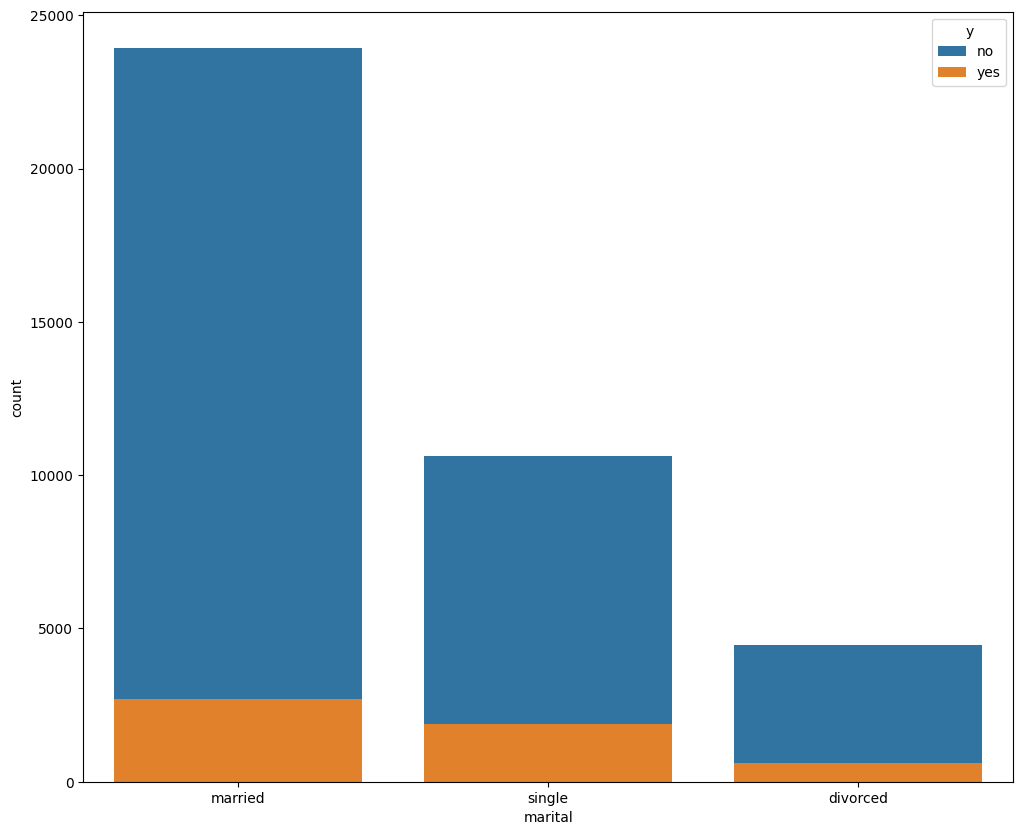

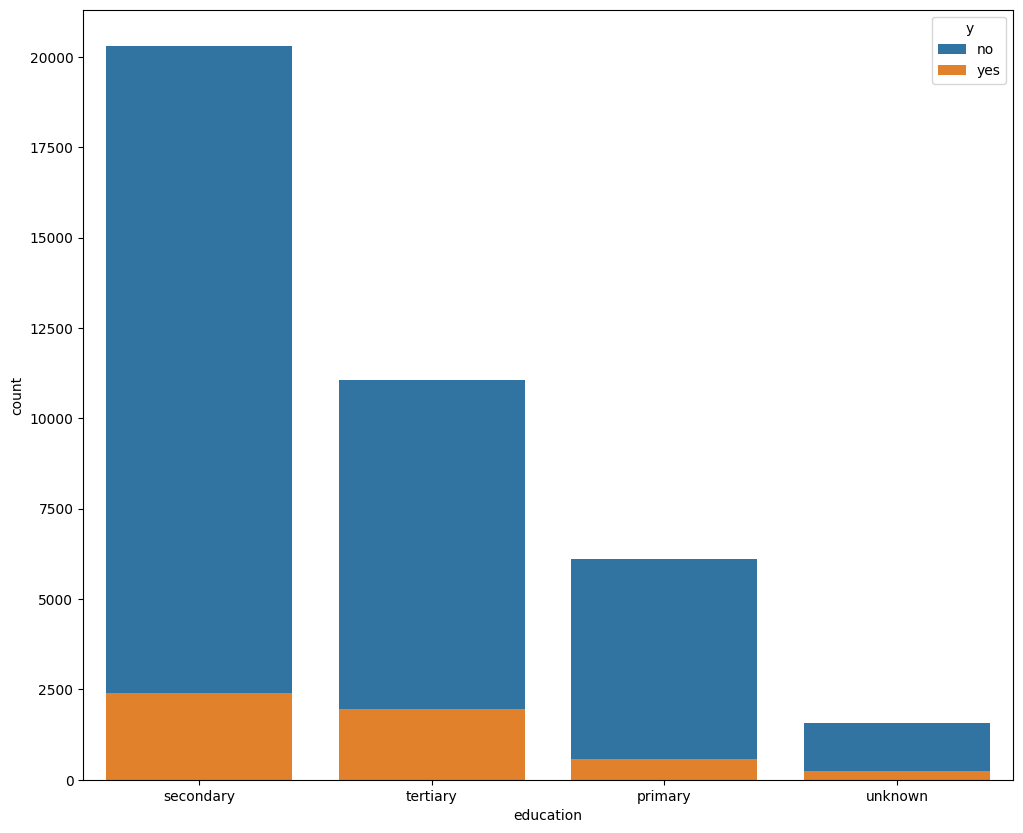

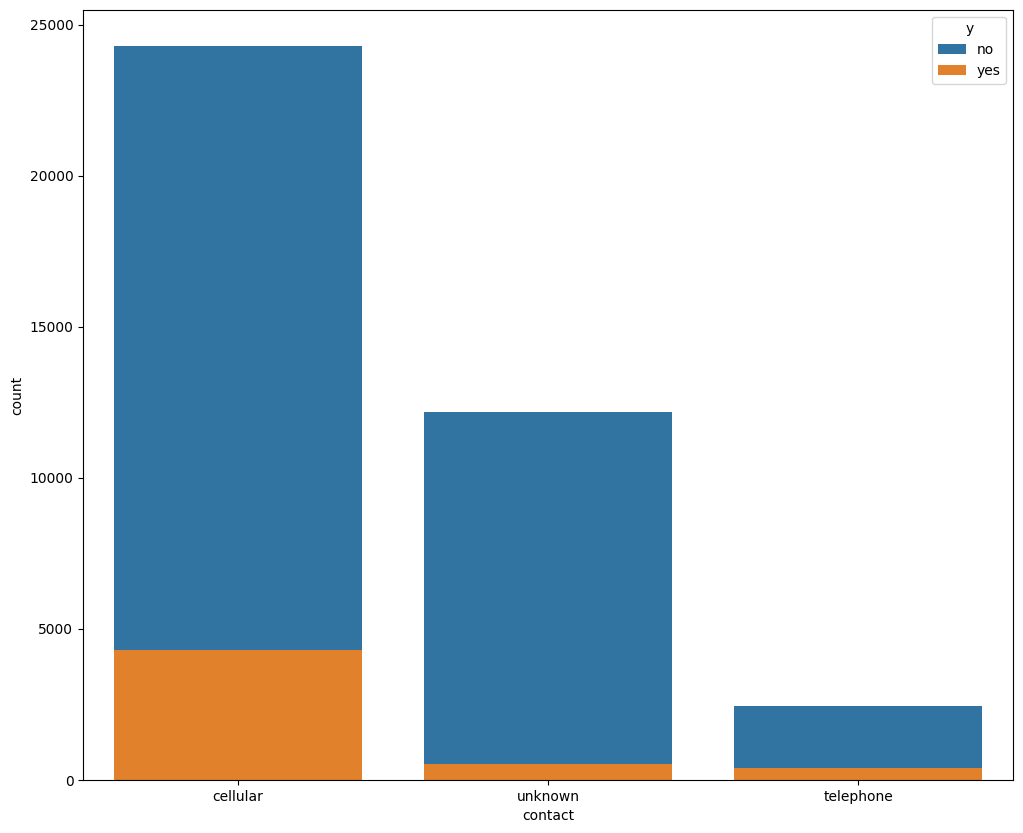

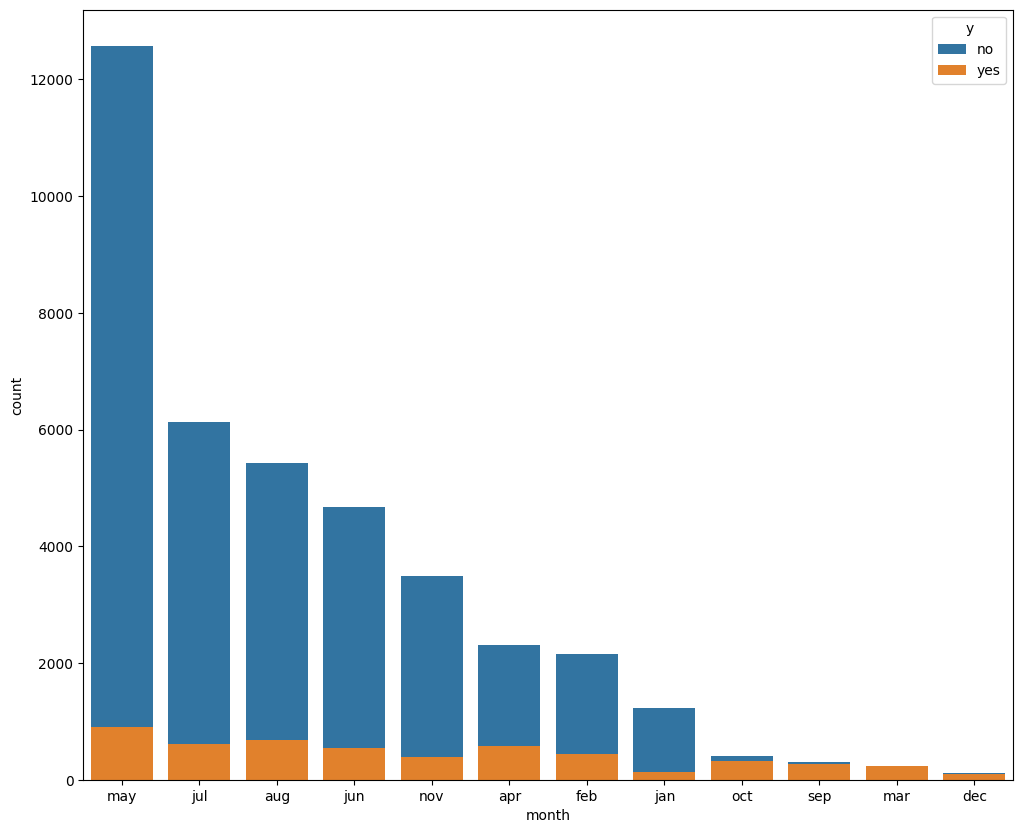

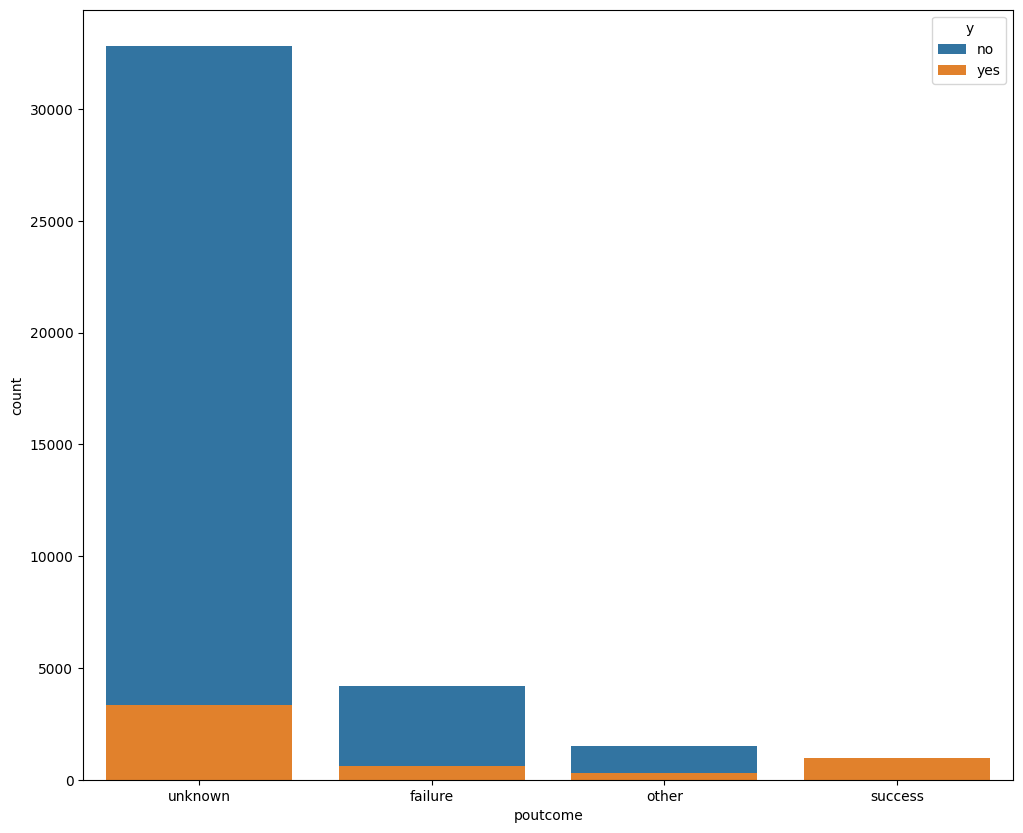

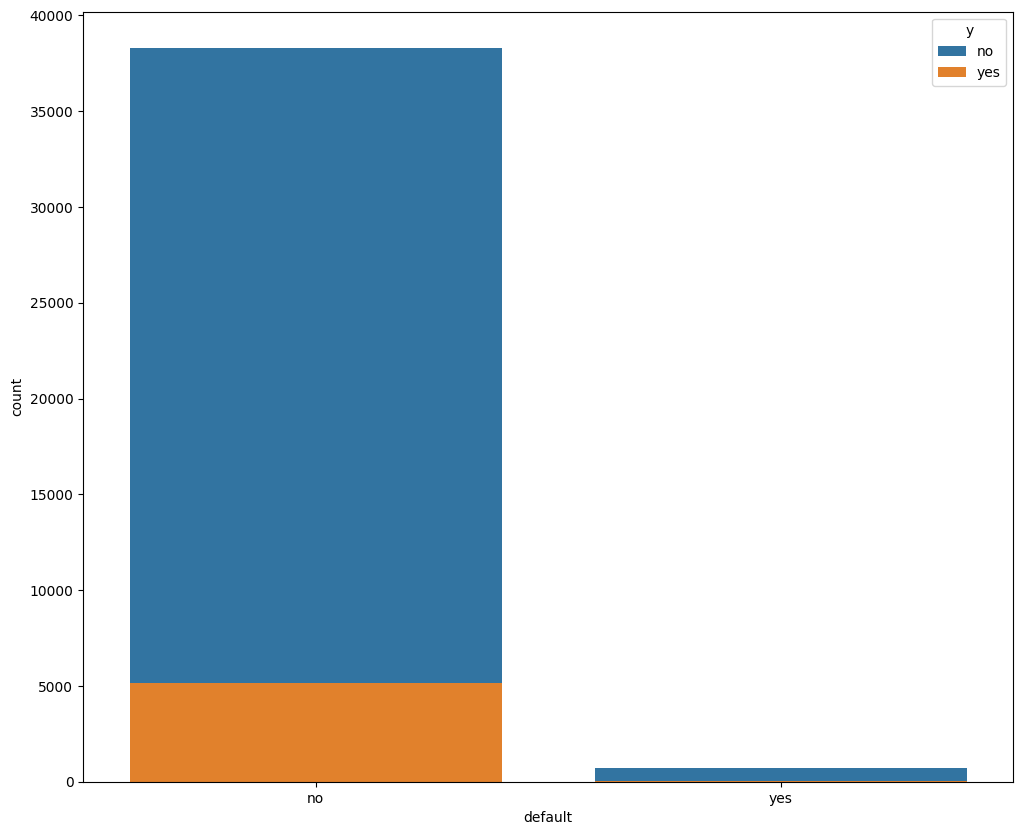

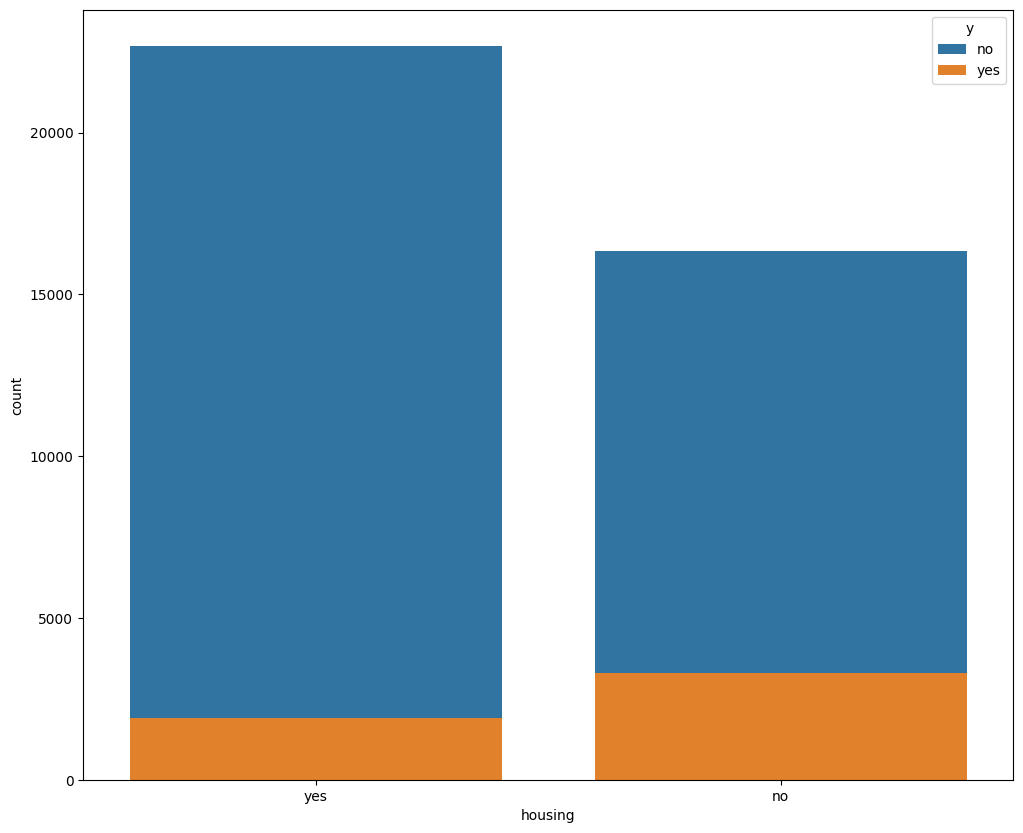

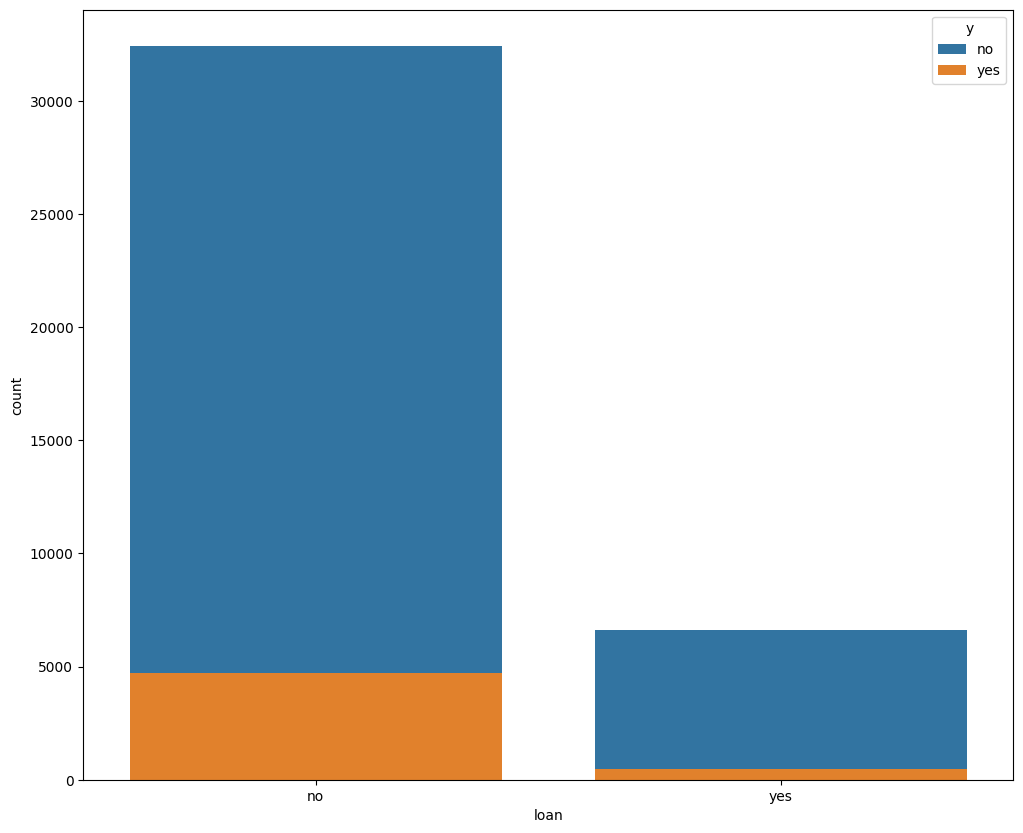

In [3]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting the numeric values

#Plotting numerical vairables 
train_data.hist(bins=50, figsize=(12,10))
plt.show()

#Plotting Cateogircal Vairables 
cat_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'default', 'housing', 'loan']

for col in cat_cols:
    data = train_data[[col, 'y']].value_counts().reset_index(name='count')
    plt.figure(figsize=(12,10))
    sns.barplot(x=col, y='count', hue='y',data=data, dodge=False)
    plt.show

Review of Distributions: 
Numeric
- age: Right skewed 
- balance: right skewed, noticable peak on the far left side of the graph
- day: unifrom distribution, peak around 19
- campaign, pdays and previous are all right skewed as well

Categorical 
- job: blue collar jobs are the most common
- marriage: married people occur the most in the dataset
- education: most observations have a secondary level of education
- contact: most respondands use a cellular for contact
- month: may had the highest frequency count
- poutcome: unknown was the most common response 
- default: no was the most common response
- housing: around 2400 respondands said they had housing loan
- loans: the most common respone was no 
- y(target): most clients have not subscribed to the term deposit 


**1.3 Replacing Mising Values** 

In [4]:
from sklearn.impute import SimpleImputer
import numpy as np

#Double checking the columns with missing values 
train_data.isnull().sum()


age_col = ['age']
#setting up the simpleimiputer to use the mean
imp = SimpleImputer(strategy='median')
#replacing the missing values with the mean for the age columns 
train_data[age_col] = imp.fit_transform(train_data[age_col])


day_col = ['day']
#Setting up the simpleimputer for day which has a uniforrm distribution
imp_d = SimpleImputer(strategy='mean')
train_data[day_col] = imp.fit_transform(train_data[day_col])


#Imputing the categorical columns
cat_missing_val = ['contact']

#Using the most frequent value to replace NAs
imp_c = SimpleImputer(strategy='most_frequent')
#Fitting the imputer
train_data[cat_missing_val] = imp_c.fit_transform(train_data[cat_missing_val])

#Verify no missing values 
train_data.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The columns age, contact and day were all misssing 5 values. Since age, is right skewed, I replaced missing values with the median. Day follows a uniform distribution so I decided to go with mean to replace missing values. Since Contact is a cateogrical varible, I replaced missing values with the mode.

**Pday and Previouos transformatin:**

In [5]:

#Converting the output for pday and previous into binary

#if there was contact a 1 is applied if not = 0 
train_data['client_contacted'] = train_data['pdays'].apply(lambda x: 0 if x <= -1 else 1)
train_data.drop(columns=['pdays'], inplace=True)


#If a client wasnt contact they are given a value of 0, if they were contacted = 1 
train_data['previous_contact'] = train_data['previous'].apply(lambda x: 0 if x == 0 else 1)
train_data.drop(columns=['previous'], inplace=True)

 I ran into some trouble later after replacing outliers with the lower and upper bound, so in this step I convert the columns pdays and previous into binary, so the results accuertly reflect the data. In both cases the majrotity of values are either -1 or 0 so when I use the IQR rule to replace outliers with the upper and lower bounds, almost all the values in the columns are converted to -1 or 0. Therefore in this step I convert the columns into binary, if a client was contacted they recieve a 1, no contact = 0.

**Pre-Processing 2.1: Outliers**

In [7]:
import numpy as np 

#Splitting the data into numeric and cateogircal columns
num_val = train_data.select_dtypes(include=[np.number])
cat_val = train_data.select_dtypes(include='category')


#Calculating the first and third quantile, which will be used to find the IQR
Q1 = num_val.quantile(0.25)
Q3 = num_val.quantile(0.75)

#calcualting the IQR
IQR = Q3 - Q1

#Setting the lower and upper bounds for the 1.5 iqr test
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

#testing to see if there are variables that fall below or above lower and upper bounds
outliers = ((num_val < LB)|(num_val > UB))

for col in num_val.columns:
    train_data[col] = np.where(train_data[col]<LB[col], LB[col], train_data[col])
    train_data[col] = np.where(train_data[col]>UB[col], UB[col], train_data[col])

#source: https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/#h-step-2-quantile-based-flooring-and-capping

print(outliers.sum())
train_data.describe()

age                 0
balance             0
day                 0
campaign            0
client_contacted    0
previous_contact    0
dtype: int64


,age,balance,day,campaign,client_contacted,previous_contact
count,44211.000000,44211.000000,44211.000000,44211.000000,44211.0,44211.0
mean,40.857060,934.734546,15.812264,2.391034,0.0,0.0
std,10.381071,1178.854382,8.313015,1.599252,0.0,0.0
min,18.000000,-1965.000000,1.000000,1.000000,0.0,0.0
25%,33.000000,72.000000,8.000000,1.000000,0.0,0.0
50%,39.000000,448.000000,16.000000,2.000000,0.0,0.0
75%,48.000000,1430.000000,21.000000,3.000000,0.0,0.0
max,70.500000,3467.000000,31.000000,6.000000,0.0,0.0


After using the 1.5 iqr test, to identify outliers, several were found in the columns age, balance, campaign, pdays and previous ranging from 477 to 8084 entries missing. For values that follow below the lower bound threshold, I replaced those values with the lower bound. For values about the upper bound, I replaced those values with the upper bound.

**2.3 Pre-Processing: Encoding data**

In [8]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


#For variables with only 2 categories I used label encoding

#selectin binary columns
b_cat = ['default', 'housing', 'loan', 'y']
#this works to encode no with 0 and yes with 1
le = LabelEncoder()
for col in b_cat:
    train_data[col] = le.fit_transform(train_data[col]) 
#Orignally I tried to just fit the transformation to all the columns, but found out you can't apply label encoding to multiple columns like that
# so I used Chatgbt to help find another approach, which suggested creating a for loop instead    

#selectin categorical columns
cat_enc = ['education', 'contact', 'month', 'poutcome']
#I used a one-hot encoder for categorical feautres, ordinal encoding wouldn't work since the data doesn't have a natural order
cat_encoder = OneHotEncoder(sparse_output=False, drop='first')

#fitting the transformation
enc_categorical = cat_encoder.fit_transform(train_data[cat_enc])

#creating a dataframe with the encoded data and the names 
df_output = pd.DataFrame(enc_categorical, 
                         columns=cat_encoder.get_feature_names_out(),
                         index=train_data.index)

#Apply all the transformations back to original df
train_data = pd.concat([train_data, df_output], axis=1)

#Dropping the original columns
train_data.drop(columns=cat_enc, inplace=True)




#Both job and marital have a large number of categories, therefore I beleive OHE isn't a good approach 
#target variables job and marital

#finding the target mean forr job and marital
job_enc = train_data.groupby('job')['y'].mean()
marital_enc = train_data.groupby('marital')['y'].mean()

#Encoding the data
train_data['marital_enc'] = train_data['marital'].map(marital_enc)
train_data['job_enc'] = train_data['job'].map(job_enc)

#dropping the orignial columns
train_data = train_data.drop(columns=['job', 'marital'])

#Source; https://stackoverflow.com/questions/68170884/how-to-apply-target-encoding-in-test-dataset


# In my original code I used a for loop to do this process but I had some trouble 
# recreating the loop later on with the test set since no tarrget varirable was prrovided.

# Target encoding is a possible way to deal with this
#big_cat = ['job', 'marital']

#for col in big_cat: 
    #encoding features with the mean of the target variable 
    #big_enc = train_data.groupby(col)['y'].mean()
    #adding it back
    #train_data[col] = train_data[col].map(big_enc)

#Target encoding source: https://www.kaggle.com/code/ryanholbrook/target-encoding

I used label encoding for binary columns, one hot encoding for categorical columns with minimum features and target encoding for variables with many features. I felt the multiple categories in the columns job and marital would add too many extra model if I encoded it. Thats why I decided to go with target encoding since it minimizes the complexity of the data.

**2.4 Pre-Processing: Correlaiton**

In [9]:
#Testing to see the correlation between variables 
cor_matrix = train_data.corr()
cor_matrix['y'].sort_values(ascending=False)

y                      1.000000
poutcome_success       0.307268
job_enc                0.136102
month_oct              0.128986
month_mar              0.128767
month_sep              0.123277
balance                0.092951
month_dec              0.075321
education_tertiary     0.066337
marital_enc            0.065144
month_feb              0.039144
poutcome_other         0.033110
age                    0.020089
contact_telephone      0.014317
education_unknown      0.012588
month_aug             -0.008466
month_jan             -0.008877
month_jun             -0.015753
month_nov             -0.016741
default               -0.022331
day                   -0.029313
month_jul             -0.034694
education_secondary   -0.036186
loan                  -0.068350
campaign              -0.084796
month_may             -0.103078
housing               -0.139482
contact_unknown       -0.150983
poutcome_unknown      -0.167838
client_contacted            NaN
previous_contact            NaN
Name: y,

After running a correlation test, it was identified that the variables poutcome_success,poutcome_unknown ,job and contact_unknown arer most strongly correlated to the predictor.

**Examing the data distribution for scaling**

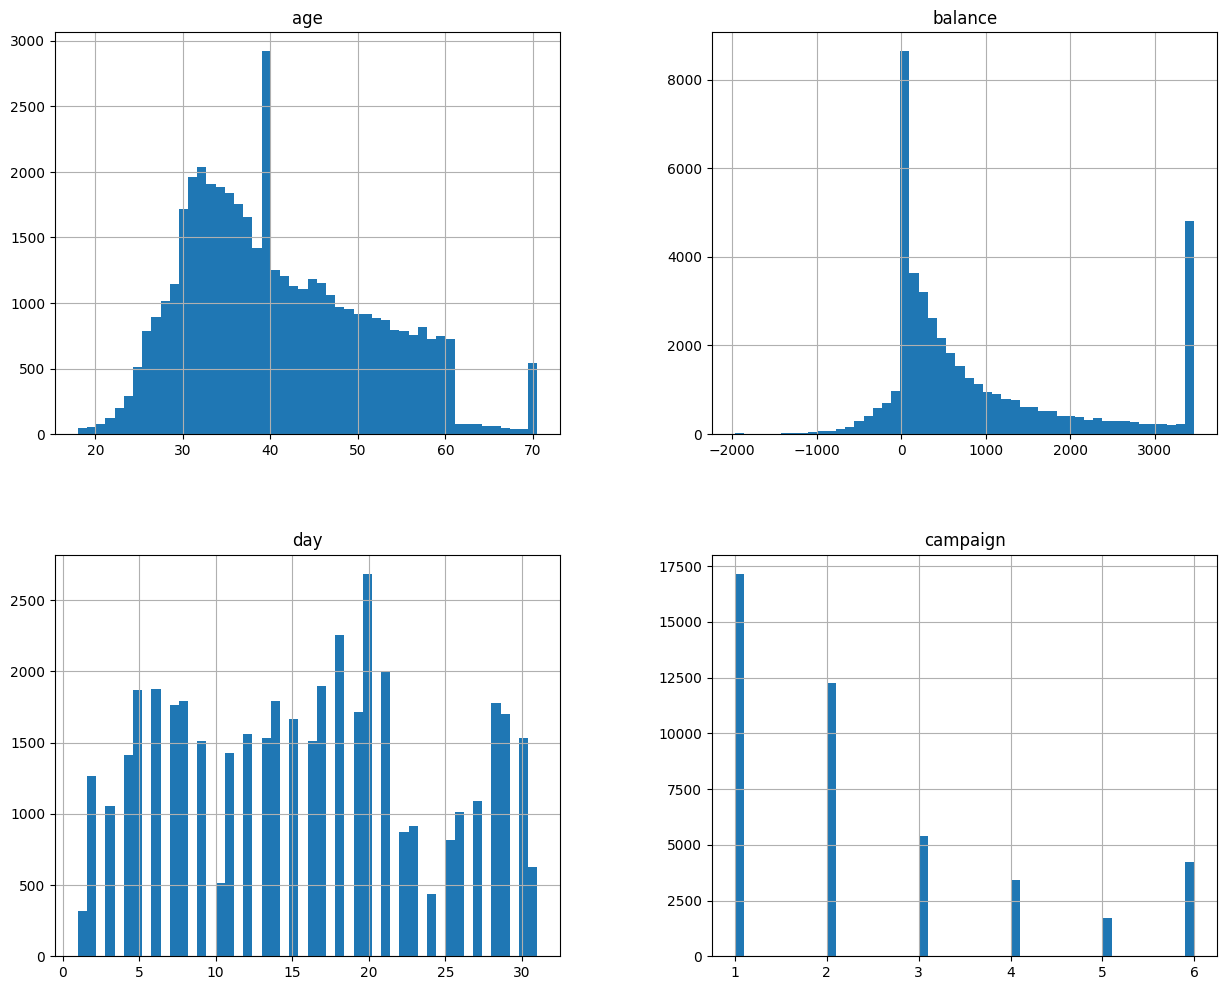

In [10]:
train_data.describe()

#I noticed the following columns had the largest difference in terms of scale
vis_ft = train_data[['age', 'balance', 'day', 'campaign']]
vis_ft.hist(bins=50, figsize=(15,12))
plt.show()

I used describe and visualized the data, to understand the scales. After encoding the data, a llarge portion of the features are set in the range of 0-1. The columns with the largest sscales now include age, balance, day and campaign. Therefore these will be the coolumns I scale in the next step

**2.5 Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler

train_data.describe()


scaled_features = ['age', 'balance', 'day', 'campaign']
#setting the scaler 
scale = StandardScaler()
#applying it to the data
train_data[scaled_features] = scale.fit_transform(train_data[scaled_features])
#Source: Used this cite to help figure out whether to normalize or standardize https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

I decided to go with standard scaling since my data generally follows a  normal distribution, with only a few peaks within the data. 

**3.0:Training the data logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

#selecting the target variable and the predictors 
y = train_data['y']
X = train_data.drop(columns=['y'])

#splitting the dataset into a training and test set, 80%, 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

#creating the model, used class weight to balance thee data since it wasn't balanced before
model = LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42)

#fitting the model to the train set
model.fit(X_train,y_train)

#Making predictions with the model
prediction = model.predict(X_test)

#model performance metrics:
#accuracy
accuracy = accuracy_score(y_test, prediction)

#F1 score test
f1_results = f1_score(y_test,prediction)

#cros validation
cross_val = cross_val_score(model, X_train, y_train, scoring='f1_weighted',cv=5)


#precision testing
precision = precision_score(y_test, prediction)

#recall testing
recall = recall_score(y_test, prediction)

print(accuracy) #0.75
print(f1_results) #0.36%
print(cross_val) #0.78-0.80
print(precision) #0.26
print(recall) #0.62

0.755512835010743
0.36336866902237924
[0.79525367 0.79532655 0.78895253 0.7958126  0.80034869]
0.2563356875778978
0.6238624873609707


The results of the logistic regressoion indicate that my model performed poorly, evidence of this can be seen in the low precision score of 0.25 and recall of 0.62. This indicates that out of all the true predictions, the model was only correct 25% of the time. The recall score of 0.62 indicates that the model correctly identifies a large portion of true cases but this comes at the cost of precision.

**3.1: logsitic grid search**

In [13]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


#Grid Search: to help improve the models perforrmance, I used hyperparameter tuning 
#Setting up the grid, to identify the best perameters for a logistic regression
p_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'penalty':['l1','l2', ] }

#fitting the model to the train set
clf = GridSearchCV(LogisticRegression(), p_grid,cv=5,scoring='f1')
clf.fit(X_train, y_train)

#printing out the results
print(clf.best_params_)

{'C': 100, 'penalty': 'l1', 'solver': 'saga'}


In the step above I implemented a grid search to identify the best parameters to use for my logistic regression. The output indicated that C should be set at 100, penalty at L1 and solver at saga. 

**3.2: RE-Running the model**

In [15]:
model_2 = LogisticRegression(C=100, penalty='l1', solver='saga', max_iter=1000, class_weight='balanced')
model_2.fit(X_train, y_train)

#Model Performance metrics
new_pred = model_2.predict(X_test)

#Testing accuracy
accuracy2 = accuracy_score(y_test, new_pred)

#F1 score
f1_results2 = f1_score(y_test,new_pred)

#cross val
cross_val2 = cross_val_score(model_2, X_train, y_train, scoring='f1',cv=5)

#precision 
precision2 = precision_score(y_test, new_pred)
recall2 = recall_score(y_test, new_pred)

print(accuracy2) # 75%
print(f1_results2) #36%
print(cross_val2) #37 - 39%
print(precision2) # 25%
print(recall2) # 63%

0.7550604998303743
0.3644366197183099
[0.37915743 0.38853503 0.37971117 0.38730385 0.39620576]
0.2567176519222819
0.627906976744186


After applying the gird search many of the paramaters now performed worse, such as the f1 score which decreased from 0.36 to now 0.35.

**3.2: Adjusting the theshold**

In [ ]:
probs = model.predict_proba(X_test)

#setting the threshold 
threshold = 0.6

#creating a prediction class
pred_final = (probs[:, 1] > threshold).astype(int)


#evaluarting the models performance
#accuracy
acc = accuracy_score(y_test,pred_final)
#f1 score
fs = f1_score(y_test, pred_final)
#precision
prec = precision_score(y_test, pred_final)
#recall
rec = recall_score(y_test, pred_final)


# Re-evaluate metrics
print(acc) # 0.85
print(fs) #0.42
print(prec ) #0.37
print(rec) #0.49

0.8480153793961326
0.4206896551724138
0.3666416228399699
0.49342770475227504


Since not much of a difference was noticed after feature scaling, I decided to adjust the threshold of my logistic regression. After adjusting it my F1 score went up to 42%. In addition my precision increased to 37% and accuracy went up to 85%. While the recall dropped to 49%.

**3.2: SDG Model**

In [17]:
from sklearn.linear_model import SGDClassifier
#trying the SGDClassifier 
sgd = SGDClassifier()

#fitting the model to the data
sgd.fit(X_train,y_train)

#making predictions
pred_3 = sgd.predict(X_test)

#testing accuracy
accuracy3 = accuracy_score(y_test, pred_3)

#evaluating f1 score
f1_results3 = f1_score(y_test,pred_3)

#cross validation
cross_val3 = cross_val_score(sgd, X_train, y_train, scoring='f1',cv=5)

#precision
precision3 = precision_score(y_test, pred_3)

#recall
recall3 = recall_score(y_test, pred_3)

print(accuracy) # 76%
print(f1_results) #36%
print(cross_val) #79% to 80%
print(precision) #26%
print(recall) #62%

0.755512835010743
0.36336866902237924
[0.79525367 0.79532655 0.78895253 0.7958126  0.80034869]
0.2563356875778978
0.6238624873609707


Similar to the logistic regression, my SDG model did not perform very well producing low performance metrics like a precision score of 26% and a recall of 62%. In addtion the f1 score was 36%.

In [28]:

#Setting up a grid search for the sdg model
sdg_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [5000, 10000],
    'penalty': ['l1' ,'l2', 'elasticnet'], 
    'learning_rate': ['constant','optimal' ,'adaptive'], 
    'loss': [ 'hinge', 'modified_huber']
}


sdg_search = GridSearchCV(sgd, sdg_grid, scoring='f1', cv=5)

sdg_search.fit(X_train, y_train)
print(sdg_search.best_params_)

#Source: https://www.kaggle.com/code/nsrose7224/sgdclassifier

{'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 10000, 'penalty': 'l2'}


/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
480 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_stochas

**Re_running the model**

In [ ]:
#Re-Running the model
sdg_final = SGDClassifier(alpha = 0.001, learning_rate = 'optimal', loss = 'modified_huber', max_iter= 10000, penalty = 'l2', class_weight='balanced', random_state=42)
sdg_final.fit(X_train,y_train)

y_pred_sdg = sdg_final.predict(X_test)


#model performance metrics:
#accuracy
accuracy = accuracy_score(y_test, y_pred_sdg)

#F1 score test
f1_results = f1_score(y_test, y_pred_sdg)

#cros validation
cross_val = cross_val_score(sdg_final, X_train, y_train, scoring='f1',cv=5)

#precision testing
precision = precision_score(y_test, y_pred_sdg)

#recall testing
recall = recall_score(y_test, y_pred_sdg)

print(accuracy) #0.89
print(f1_results) #0.32%
print(cross_val) #0.38-0.41
print(precision) #0.27
print(recall) #0.60


0.7722492366843832
0.3686520376175549
[0.3871241  0.39271104 0.41883859 0.41527002 0.34996919]
0.26715129486597
0.5945399393326593


After performing the grid search, I noticed my f1 score decreased, while my accuracy increased. In addition the recall of the model also improved, but this was at the cost of the precision which is now at 27% which is very low. The cross validaiton also indicates signs of overfitting as seen with the great difference between the accuracy and the cross vals.

**3.3: RandomForest Model**

In [34]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

#creating the model, used class weight to balance thee data since it wasn't balanced before
rf_model = RandomForestClassifier(class_weight='balanced',random_state=42)

#fitting the model to the train set
rf_model.fit(X_train, y_train)

#Making predictions with the model
prediction = rf_model.predict(X_test)

#model performance metrics:
#accuracy
accuracy = accuracy_score(y_test, prediction)

#F1 score test
f1_results = f1_score(y_test,prediction)

#cros validation
cross_val = cross_val_score(rf_model, X_train, y_train, scoring='f1',cv=5)


#precision testing
precision = precision_score(y_test, prediction)

#recall testing
recall = recall_score(y_test, prediction)

print(accuracy) #0.90
print(f1_results) #0.33%
print(cross_val) #0.29-0.31
print(precision) #0.60
print(recall) #0.23

0.8964152436955785
0.33138686131386863
[0.31382979 0.31087152 0.29775785 0.29347826 0.29326047]
0.5958005249343832
0.2295247724974722


After applying the random forest model, some of my metric performed better as seen with the accuracy score of 89%. But this model focuses more on precision than recall as seen with the high precision value of 60% while the recall is only 22. 

**Hyperparameter tuning**

In [35]:
from sklearn.model_selection import RandomizedSearchCV


rf_grid = {'n_estimators': [100, 100, 300],
               'max_depth': [10, 20, 30, 40, None],
               'max_features': ['log2', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               }


#Setting up to the model
rfc = RandomizedSearchCV(rf_model, rf_grid, n_iter = 10, scoring = 'f1', random_state=42, cv=5, error_score='raise')

rfc.fit(X_train, y_train)

#printing out the results
print(rfc.best_params_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30}


I decided to implement a rnadomizedsearchcv to identify the best parameters for my model. Orignally I tried to implement a gridsearch but similar to the grid search it took a long time to run. The output of the best parameters can be seen above.

**RE-Running the model RF.2(best performing model)**

In [65]:

#Re-running the model with the best paramaters now 
rf_model2 = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 4, max_features = 'log2', max_depth = 30
, class_weight='balanced',random_state=42)

#selecting the target variable and the predictors 
y = train_data['y']
X = train_data.drop(columns=['y'])

#splitting the dataset into a training and test set, 80%, 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)


#fitting the model to the train set
rf_model2.fit(X_train, y_train)

#Making predictions with the model
prediction = rf_model2.predict(X_test)

#model performance metrics:
#accuracy
accuracy = accuracy_score(y_test, prediction)

#F1 score test
f1_results = f1_score(y_test,prediction)

#cros validation
cross_val = cross_val_score(rf_model2, X_train, y_train, scoring='f1',cv=5)


#precision testing
precision = precision_score(y_test, prediction)

#recall testing
recall = recall_score(y_test, prediction)

print(accuracy) #0.87
print(f1_results) #0.47%
print(cross_val) #0.46-0.48
print(precision) #0.42
print(recall) #0.51

0.8672396245618003
0.465391621129326
[0.46943231 0.47566976 0.45604396 0.47149972 0.48676056]
0.4233637116818558
0.5166835187057633


This model performed relatively well, producing an accuracy score around 86% and f1 of 46(my highest yet). Although the results of the cross vallidation are low, all in the high 40s, similarly the results of the precision and recall test are also low. But with a focus of maximizing f1 score, I beleive that so far this model has performed the best. 

**Adjusting the theshold**

In [ ]:
#Setting the decision theshold 
threshold = 0.4

#adjusting the theshold
pred_probs = rf_model2.predict_proba(X_test)
prediction2 = (pred_probs[:,1]>= threshold).astype('int')


#Making predictions with the model
#pred_2 = rf_model2.predict(X_test)

#model performance metrics:
#accuracy
accuracy = accuracy_score(y_test, prediction2)

#F1 score test
f1_results = f1_score(y_test,prediction2)


#cros validation
cross_val = cross_val_score(rf_model2, X_train, y_train, scoring='f1',cv=5)

#precision testing
precision = precision_score(y_test, prediction2)

#recall testing
recall = recall_score(y_test, prediction2)


print(accuracy) #0.87
print(f1_results) #0.44%
print(cross_val) #0.46-0.49
print(precision) #0.43
print(recall) #0.50



0.8255117041727921
0.44235634260932416
[0.46943231 0.47566976 0.45604396 0.47149972 0.48676056]
0.344206974128234
0.6188068756319515


I played around with a few theshold values(0.3-0.8), both above and below the standard, but I found that leaving it at 0.5 produced the best results. Since changing the theshold did not result in my models f1 score improving I decided to leave it as it currently is at 0.5.

**Balanceing the target using smote**

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#Setting up smote
smote = SMOTE(random_state=42)  

#applying it to the train set 
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

#fitting it to the model
rf_model2.fit(X_train_smote, y_train_smote)


#Making predictions with the model
prediction = rf_model2.predict(X_test)

#model performance metrics:
#accuracy
accuracy = accuracy_score(y_test, prediction)

#F1 score test
f1_results = f1_score(y_test,prediction)

#cros validation
cross_val = cross_val_score(rf_model2, X_train_smote, y_train_smote, scoring='f1',cv=6)


#precision testing
precision = precision_score(y_test, prediction)

#recall testing
recall = recall_score(y_test, prediction)

print(accuracy) #0.88
print(f1_results) #0.43%
print(cross_val) #0.73-0.93
print(precision) #0.46
print(recall) #0.39



0.8814881827434129
0.4322860238353196
[0.68389759 0.93732085 0.93298721 0.93801574 0.92896909 0.93814334]
0.46557759626604434
0.4034378159757331


 Since the cross validation was low, I decided to try using smote to help balance the data again. While the cross validations results improved, the difference between them is drastic which may indicate signs oof overfitting. Additonally the f1 score decrease. Therefore, based on all the models run so far, I beleive the randomforest model(rf_model2) performed best, without adjusting the theshold and without using smote to balance the data. It produced a f1 score of 42% and an accuracy score of 88%. It should be noted that the precison and recall values are both low, but the scores are close to each other(46 and 39). In addition, the cross validatioon results indicate that the model is performing well consistently, as all the results were greater than 86%. 

**Feauter Importance testing**

<Axes: >

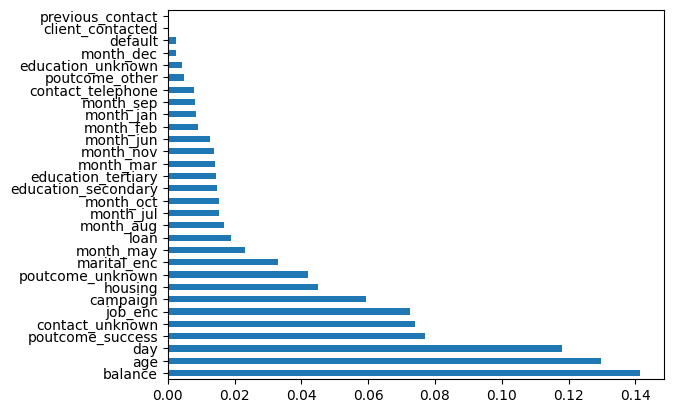

In [45]:
#Identifying the most important features 
ft_imp = rf_model2.feature_importances_

#Looking for the best features
important_features = pd.Series(ft_imp, index=X.columns)
important_features.nlargest(30).plot(kind='barh')

#Source: https://stackoverflow.com/questions/44511636/plot-feature-importance-with-feature-names


**Feature_scaling**

In [48]:
#Selecting all features with a score greater than 0.015
new_fts = important_features[important_features>0.015].index.tolist()

#creating a new test and train set with the selected features
x_train_fts = X_train[new_fts]
x_test_fts = X_test[new_fts]

#fitting it to my model 
rf_model2.fit(x_train_fts, y_train)

#making predictions
pred_fts = rf_model2.predict(x_test_fts)

#accuracy
accuracy_fts = accuracy_score(y_test, prediction2)


#new f1 score
f1_fts = f1_score(y_test, pred_fts)

#cros validation
cross_val_fts = cross_val_score(rf_model2, X_train, y_train, scoring='f1',cv=5)

#precision testing
precision_fts = precision_score(y_test, prediction2)

#recall testing
recall_fts = recall_score(y_test, prediction2)

print(accuracy_fts) #82
print(f1_fts) #44
print(cross_val_fts) #45-47
print(precision_fts) #35
print(recall_fts) #50



0.8255117041727921
0.44028776978417267
[0.46943231 0.47566976 0.45604396 0.47149972 0.48676056]
0.344206974128234
0.6188068756319515


After removing features that had an importance of less than 0.015, my models f1 score decreased, I played around with a few other values like 0.2 and 0.6 but was unable to improve my f1 score significantly.

**Ensamble Model**

In [ ]:
from sklearn.ensemble import VotingClassifier 


#Building an ensamble model using hard voting 
voting_clf = VotingClassifier(estimators=[('lr',model),
                                          ('sgd', sgd), ('rf', rf_model2)], voting='hard')

#Fitting the model

voting_clf.fit(X_train, y_train)
y_final = voting_clf.predict(X_test)

f1_s = f1_score(y_test, y_final)


#accuracy
accuracy_fts_e = accuracy_score(y_test, y_final)

#cros validation
cross_val_fts_e = cross_val_score(voting_clf, X_train, y_train, scoring='f1',cv=5)

#precision testing
precision_fts_e = precision_score(y_test, y_final)

#recall testing
recall_fts_e = recall_score(y_test, y_final)


#printing the results 
print(accuracy_fts_e) #87
print(f1_s) #45
print(cross_val_fts_e) #45-0.47
print(precision_fts_e) #43
print(recall_fts_e) #47

0.8733461494967771
0.4563106796116505
[0.46224256 0.47482838 0.45571096 0.46893318 0.47465713]
0.4388422035480859
0.4752275025278059


While this model has a high accuracy score of 87% and a f1 score of 45%(second highesst so far) the cross validation produced values all below 50%. This indicates that the model may be overfitting to the training set. Based on these results, I beleive when working to maximize f1 score, the best model to achieve this would be the randomforest model(rf_model2). This model produced the highest f1 score at 46% on the training data. Addtionally accuracy was 87% and the tradeoff between precision and recall was split somewhat evenly(43% and 50%).

Therefore, to re-iterate, based on the performance metrics of my models, the rf_model2 without adjusting for features, smote or theshold performed the best in terms of f1 score. It produced an accurcacy result of 87%, f1 f 46% cross validations 46-48, precision of 42 and recall of 51. 

**Running on test set**

**4.1: Loading the data:**

In [49]:
from sklearn.impute import SimpleImputer
import numpy as np


#loading the data
test_data = pd.read_csv('data/bank_test.csv')

#Double checking the columns with missing values 
test_data.isnull().sum()

Unnamed: 0    0
age           5
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       5
day           5
month         0
campaign      0
pdays         0
previous      0
poutcome      0
dtype: int64

**Replacing Missing Values**

In [50]:
from sklearn.impute import SimpleImputer
import numpy as np

#Double checking the columns with missing values 
test_data.isnull().sum()

#age concat and day are missing values 

age_col = ['age']
#setting up the simpleimiputer to use the mean
imp = SimpleImputer(strategy='median')
#replacing the missing values with the mean for the age columns 
test_data[age_col] = imp.fit_transform(test_data[age_col])


day_col = ['day']
#Setting up the simpleimputer for day which has a uniforrm distribution
imp_d = SimpleImputer(strategy='mean')
test_data[day_col] = imp.fit_transform(test_data[day_col])


#Imputing the categorical columns
cat_missing_val = ['contact']

#Using the most frequent value to replace NAs
imp_c = SimpleImputer(strategy='most_frequent')
#Fitting the imputer
test_data[cat_missing_val] = imp_c.fit_transform(test_data[cat_missing_val])

#Verify no missing values 
test_data.isnull().sum()


Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
dtype: int64

**Pday Transformation**

In [51]:

#Converting the output for pday and previous into binary

#if there was contact a 1 is applied if not = 0 
test_data['client_contacted'] = test_data['pdays'].apply(lambda x: 0 if x <= -1 else 1)
test_data.drop(columns=['pdays'], inplace=True)


#If a client wasnt contact they are given a value of 0, if they were contacted = 1 
test_data['previous_contact'] = test_data['previous'].apply(lambda x: 0 if x == 0 else 1)
test_data.drop(columns=['previous'], inplace=True)

**Outliers**

In [52]:

import numpy as np 

#Splitting the data into numeric and cateogircal columns
num_val = test_data.select_dtypes(include=[np.number])
cat_val = test_data.select_dtypes(include='object')


#Calculating the first and third quantile, which will be used to find the IQR
Q1 = num_val.quantile(0.25)
Q3 = num_val.quantile(0.75)

#calcualting the IQR
IQR = Q3 - Q1

#Setting the lower and upper bounds for the 1.5 iqr test
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

#testing to see if there are variables that fall below or above lower and upper bounds
outliers = ((num_val < LB)|(num_val > UB))

for col in num_val.columns:
    test_data[col] = np.where(test_data[col]<LB[col], LB[col], test_data[col])
    test_data[col] = np.where(test_data[col]>UB[col], UB[col], test_data[col])

#source: https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/#h-step-2-quantile-based-flooring-and-capping

print(outliers.sum())
test_data.describe()

Unnamed: 0            0
age                   6
balance              96
day                   0
campaign             76
client_contacted    173
previous_contact    173
dtype: int64


,Unnamed: 0,age,balance,day,campaign,client_contacted,previous_contact
count,1000.0000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.0
mean,22169.2190,41.172000,887.37300,15.570000,2.445000,0.0,0.0
std,12787.7516,10.395503,1081.17647,8.204536,1.637576,0.0,0.0
min,42.0000,21.000000,-1480.00000,1.000000,1.000000,0.0,0.0
25%,11105.2500,33.000000,74.75000,8.000000,1.000000,0.0,0.0
50%,22313.0000,40.000000,460.50000,15.000000,2.000000,0.0,0.0
75%,32576.7500,49.000000,1321.50000,21.000000,3.000000,0.0,0.0
max,45099.0000,73.000000,3191.62500,31.000000,6.000000,0.0,0.0


In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   float64
 1   age               1000 non-null   float64
 2   job               1000 non-null   object 
 3   marital           1000 non-null   object 
 4   education         1000 non-null   object 
 5   default           1000 non-null   object 
 6   balance           1000 non-null   float64
 7   housing           1000 non-null   object 
 8   loan              1000 non-null   object 
 9   contact           1000 non-null   object 
 10  day               1000 non-null   float64
 11  month             1000 non-null   object 
 12  campaign          1000 non-null   float64
 13  poutcome          1000 non-null   object 
 14  client_contacted  1000 non-null   float64
 15  previous_contact  1000 non-null   float64
dtypes: float64(7), object(9)
memory usage: 125.

**Encoding**

In [53]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


#For variables with only 2 categories I used label encoding

#selectin binary columns
b_cat = ['default', 'housing', 'loan']
#this works to encode no with 0 and yes with 1
le = LabelEncoder()
for col in b_cat:
    test_data[col] = le.fit_transform(test_data[col]) 
#Orignally I tried to just fit the transformation to all the columns, but found out you can't apply label encoding to multiple columns like that
# so I used Chatgbt to help find another approach, which suggested creating a for loop instead    

#selectin categorical columns
cat_enc = ['education', 'contact', 'month', 'poutcome']
#I used a one-hot encoder for categorical feautres, ordinal encoding wouldn't work since the data doesn't have a natural order
cat_encoder = OneHotEncoder(sparse_output=False, drop='first')

#fitting the transformation
enc_categorical = cat_encoder.fit_transform(test_data[cat_enc])

#creating a dataframe with the encoded data and the names 
df_output = pd.DataFrame(enc_categorical, 
                         columns=cat_encoder.get_feature_names_out(),
                         index=test_data.index)

#Apply all the transformations back to original df
test_data = pd.concat([test_data, df_output], axis=1)

#Dropping the original columns
test_data.drop(columns=cat_enc, inplace=True)


#Both job and marital have a large number of categories, therefore I beleive OHE isn't a good approach 
# Target encoding is a possible way to deal with this

#Encoding the data
test_data['marital_enc'] = test_data['marital'].map(marital_enc)
test_data['job_enc'] = test_data['job'].map(job_enc)

#dropping the orignial columns
test_data = test_data.drop(columns=['job', 'marital'])


#Target encoding with the test set source:https://stackoverflow.com/questions/68170884/how-to-apply-target-encoding-in-test-dataset

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_features = ['age', 'balance', 'day', 'campaign']
#setting the scaler 
scale = StandardScaler()
#applying it to the data
test_data[scaled_features] = scale.fit_transform(test_data[scaled_features])
#Source: Used this cite to help figure out whether to normalize or standardize https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


**Dropping Unamed: 0 column**

In [60]:
test_data = test_data.drop(columns=['Unnamed: 0'], errors='ignore')

Making predictions and saving

In [75]:
#Predictng on the test set
test_preds = rf_model2.predict(test_data)

#saving to answers file
answers = pd.DataFrame({'y_preds': test_preds})
answers.to_csv('answers.csv', index=False)